### Load data

In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [333]:
dataset = '../data/digital_diet_mental_health.csv'
df = pd.read_csv(dataset, header=0)

In [334]:
# Drop user_id column
df.drop(columns=['user_id'], inplace=True)

In [335]:
df.head()

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [336]:
df.shape

(2000, 24)

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               2000 non-null   int64  
 1   gender                            2000 non-null   object 
 2   daily_screen_time_hours           2000 non-null   float64
 3   phone_usage_hours                 2000 non-null   float64
 4   laptop_usage_hours                2000 non-null   float64
 5   tablet_usage_hours                2000 non-null   float64
 6   tv_usage_hours                    2000 non-null   float64
 7   social_media_hours                2000 non-null   float64
 8   work_related_hours                2000 non-null   float64
 9   entertainment_hours               2000 non-null   float64
 10  gaming_hours                      2000 non-null   float64
 11  sleep_duration_hours              2000 non-null   float64
 12  sleep_

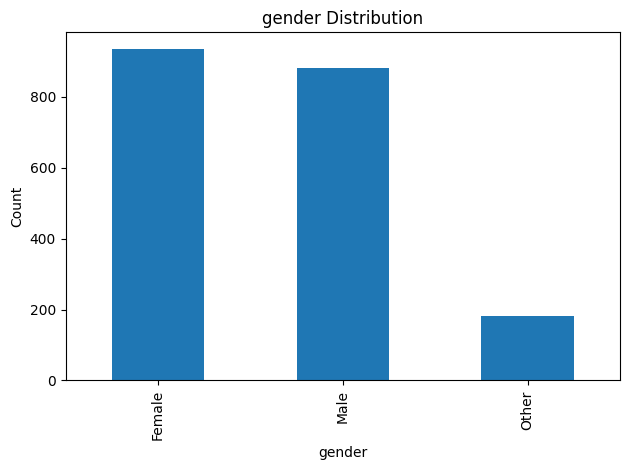

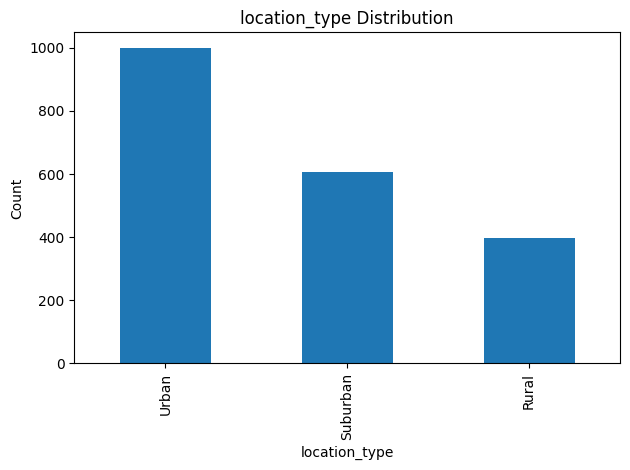

In [338]:
# Loop through non-numeric columns
for column in df.select_dtypes(include='object').columns:
    plt.figure()
    df[column].value_counts().plot(kind='bar')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

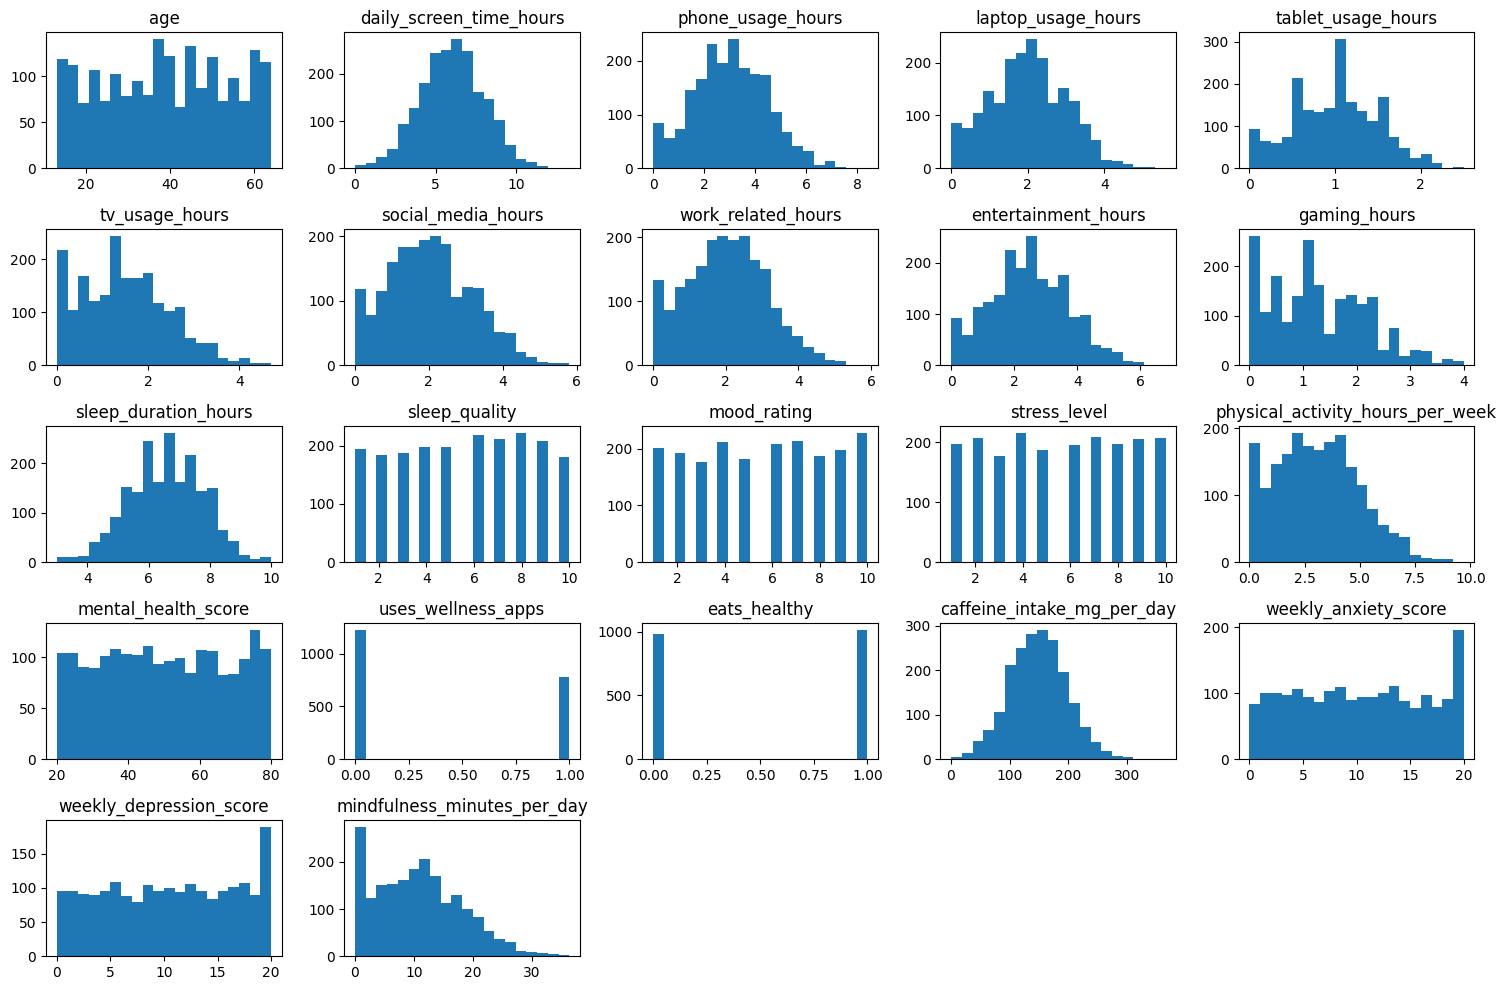

In [339]:
df.hist(bins=20, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

### Missing values

In [340]:
df.isna().sum()

age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64

### Outliers

<Axes: >

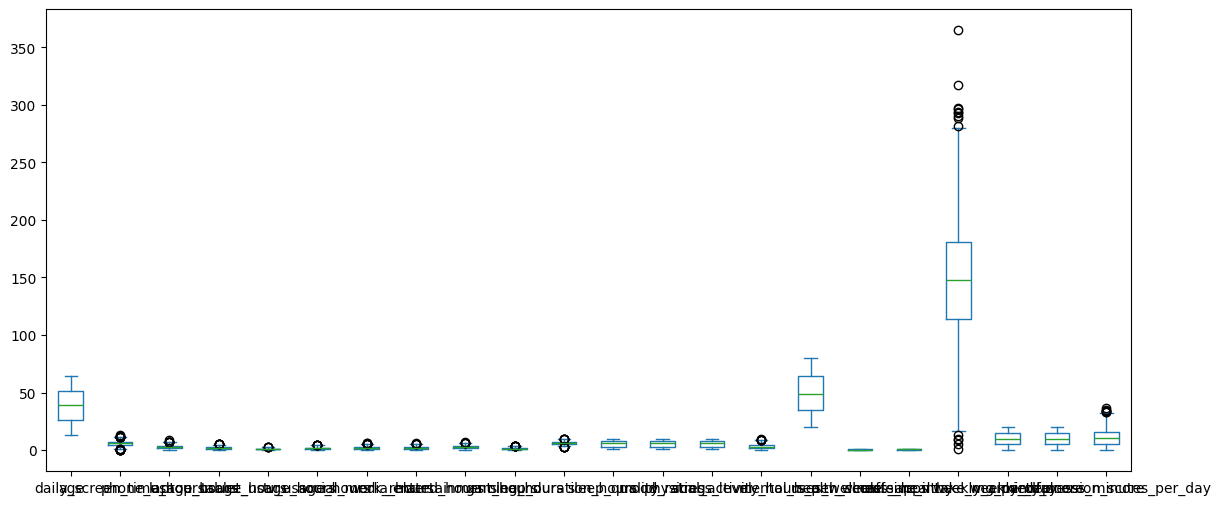

In [341]:
df.plot(kind='box', figsize=(14,6))

C:\Users\omeru\AppData\Local\Temp\ipykernel_10360\3688089724.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10,0.3))


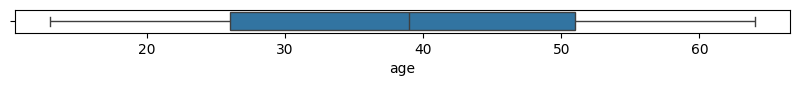

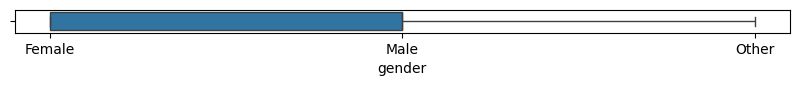

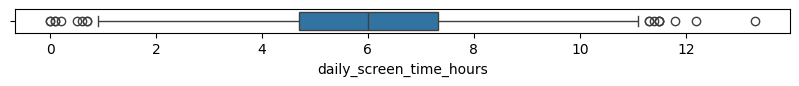

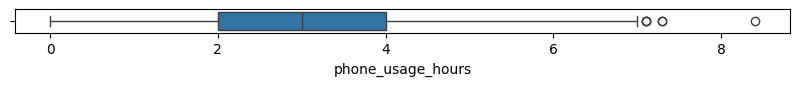

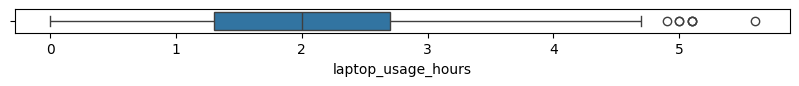

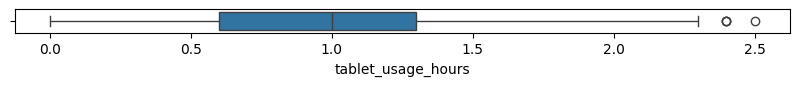

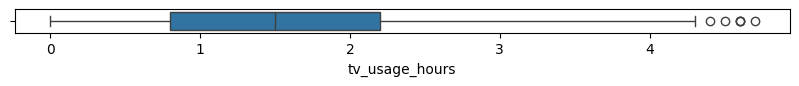

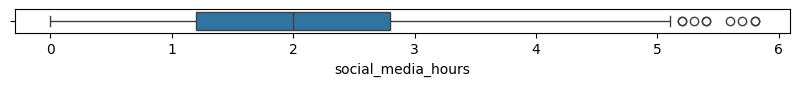

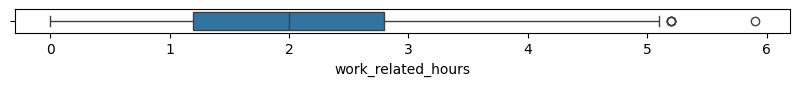

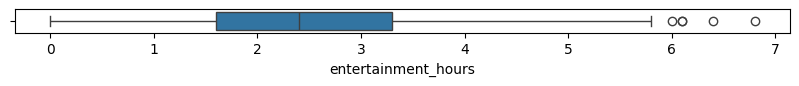

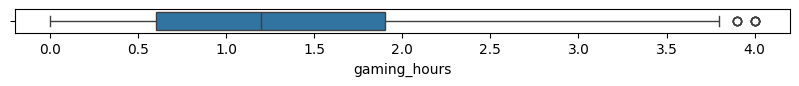

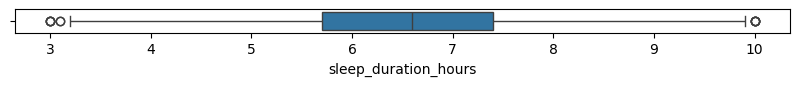

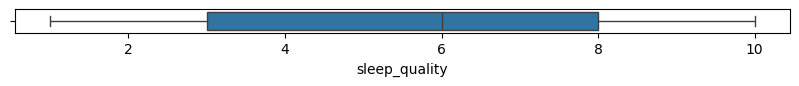

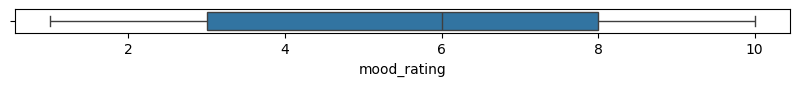

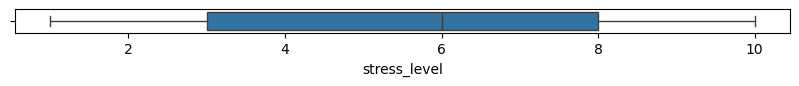

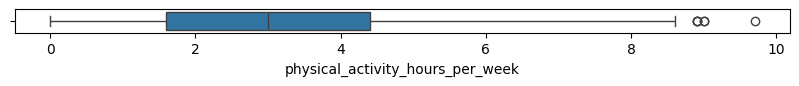

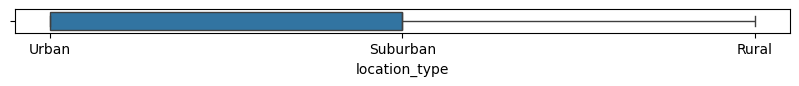

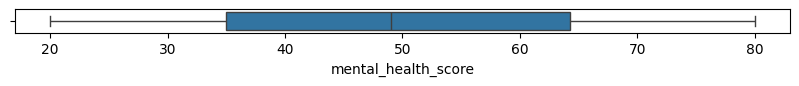

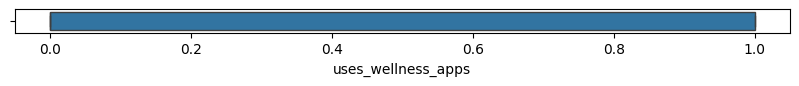

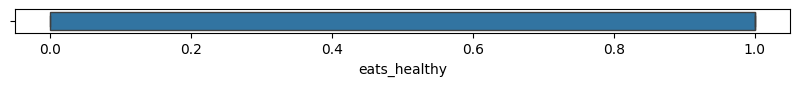

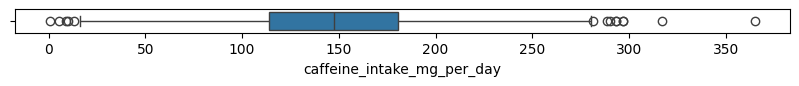

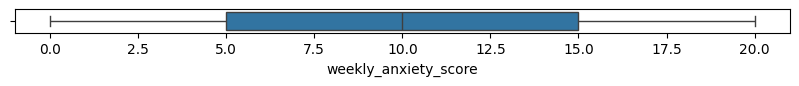

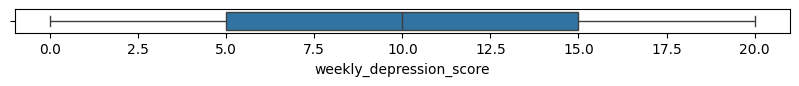

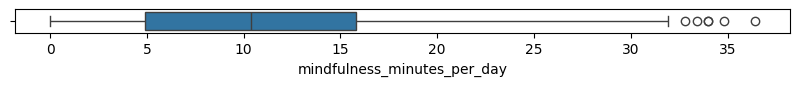

In [342]:
for column in df:
    plt.figure(figsize=(10,0.3))
    sns.boxplot(df[column], orient='h')

In [343]:
print('Upper and Lower Fence (IQR method):')

for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    print(f"{column}: Lower Fence = {lower_fence}, Upper Fence = {upper_fence}")


Upper and Lower Fence (IQR method):
age: Lower Fence = -11.5, Upper Fence = 88.5
daily_screen_time_hours: Lower Fence = 0.7625000000000002, Upper Fence = 11.2625
phone_usage_hours: Lower Fence = -1.0, Upper Fence = 7.0
laptop_usage_hours: Lower Fence = -0.8, Upper Fence = 4.800000000000001
tablet_usage_hours: Lower Fence = -0.45000000000000007, Upper Fence = 2.35
tv_usage_hours: Lower Fence = -1.3, Upper Fence = 4.300000000000001
social_media_hours: Lower Fence = -1.2, Upper Fence = 5.199999999999999
work_related_hours: Lower Fence = -1.2, Upper Fence = 5.199999999999999
entertainment_hours: Lower Fence = -0.9499999999999997, Upper Fence = 5.85
gaming_hours: Lower Fence = -1.3499999999999996, Upper Fence = 3.8499999999999996
sleep_duration_hours: Lower Fence = 3.15, Upper Fence = 9.950000000000001
sleep_quality: Lower Fence = -4.5, Upper Fence = 15.5
mood_rating: Lower Fence = -4.5, Upper Fence = 15.5
stress_level: Lower Fence = -4.5, Upper Fence = 15.5
physical_activity_hours_per_week

In [344]:
print('Outliers (IQR method on numerical columns):')

# Loop through only numerical columns
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_fence) | (df[column] > upper_fence)]
    print(f"{column}: {len(outliers)} outliers")


Outliers (IQR method on numerical columns):
age: 0 outliers
daily_screen_time_hours: 18 outliers
phone_usage_hours: 6 outliers
laptop_usage_hours: 7 outliers
tablet_usage_hours: 4 outliers
tv_usage_hours: 6 outliers
social_media_hours: 9 outliers
work_related_hours: 5 outliers
entertainment_hours: 5 outliers
gaming_hours: 9 outliers
sleep_duration_hours: 11 outliers
sleep_quality: 0 outliers
mood_rating: 0 outliers
stress_level: 0 outliers
physical_activity_hours_per_week: 6 outliers
mental_health_score: 0 outliers
uses_wellness_apps: 0 outliers
eats_healthy: 0 outliers
caffeine_intake_mg_per_day: 14 outliers
weekly_anxiety_score: 0 outliers
weekly_depression_score: 0 outliers
mindfulness_minutes_per_day: 6 outliers


In [345]:
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)  # Calculating quantiles for IQR
    Q3 = df[column].quantile(0.75)  # Calculating quantiles for IQR
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    df = df[~((df [column] < Lower_Fence) |(df[column] > Upper_Fence))]

df

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,27,Other,4.9,1.5,1.6,1.5,1.4,1.9,4.1,2.4,...,2,3.4,Urban,21,1,0,173.1,14,1,17.4
1995,58,Female,5.6,4.0,2.5,0.3,1.5,1.1,1.2,2.1,...,9,0.0,Urban,62,0,1,164.9,20,17,4.9
1997,64,Female,7.4,3.0,0.0,1.4,0.9,0.8,2.6,4.1,...,4,6.5,Urban,54,1,0,101.3,1,20,9.5
1998,19,Male,4.2,4.4,2.3,0.9,1.4,1.7,1.2,2.0,...,8,2.6,Urban,28,0,0,123.7,1,11,13.4


In [346]:
for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)  # Calculating quantiles for IQR
    Q3 = df[column].quantile(0.75)  # Calculating quantiles for IQR
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    df = df[~((df [column] < Lower_Fence) |(df[column] > Upper_Fence))]

df

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,27,Other,4.9,1.5,1.6,1.5,1.4,1.9,4.1,2.4,...,2,3.4,Urban,21,1,0,173.1,14,1,17.4
1995,58,Female,5.6,4.0,2.5,0.3,1.5,1.1,1.2,2.1,...,9,0.0,Urban,62,0,1,164.9,20,17,4.9
1997,64,Female,7.4,3.0,0.0,1.4,0.9,0.8,2.6,4.1,...,4,6.5,Urban,54,1,0,101.3,1,20,9.5
1998,19,Male,4.2,4.4,2.3,0.9,1.4,1.7,1.2,2.0,...,8,2.6,Urban,28,0,0,123.7,1,11,13.4


### Encoding Categorical Nonnumerical Variables with LabelEncoding and OneHotEncoder

In [347]:
data_column_category =df.select_dtypes(exclude=[np.number]).columns
data_column_category

Index(['gender', 'location_type'], dtype='object')

In [348]:
df[data_column_category].head()

,gender,location_type
0,Female,Urban
1,Male,Suburban
2,Other,Suburban
3,Other,Rural
4,Male,Urban


In [349]:
# Initialiser encoder
onehot_encoder = OneHotEncoder(sparse_output=False)  # Brug sparse=False hvis du bruger ældre scikit-learn

# Fit og transformér de kategoriske kolonner
onehot_encoded = onehot_encoder.fit_transform(df[data_column_category])

# Lav en DataFrame med kolonnenavne
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(data_column_category))


In [350]:
# Behold numeriske kolonner
data_column_numeric = df.select_dtypes(include=[np.number]).reset_index(drop=True)

# Kombinér
df = pd.concat([onehot_encoded_df, data_column_numeric], axis=1)


In [351]:
print("One-hot encodet DataFrame:")
df.head()


One-hot encodet DataFrame:


,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,...,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,1.0,0.0,0.0,0.0,0.0,1.0,51,4.8,3.4,1.3,...,6,10,0.7,32,1,1,125.2,13,15,4.0
1,0.0,1.0,0.0,0.0,1.0,0.0,64,3.9,3.5,1.8,...,5,6,4.3,75,0,1,150.4,19,18,6.5
2,0.0,0.0,1.0,0.0,1.0,0.0,41,10.5,2.1,2.6,...,5,5,3.1,22,0,0,187.9,7,3,6.9
3,0.0,0.0,1.0,1.0,0.0,0.0,27,8.8,0.0,0.0,...,10,5,0.0,22,0,1,73.6,7,2,4.8
4,0.0,1.0,0.0,0.0,0.0,1.0,55,5.9,1.7,1.1,...,8,7,3.0,64,1,1,217.5,8,10,0.0


In [352]:
df.columns

Index(['gender_Female', 'gender_Male', 'gender_Other', 'location_type_Rural',
       'location_type_Suburban', 'location_type_Urban', 'age',
       'daily_screen_time_hours', 'phone_usage_hours', 'laptop_usage_hours',
       'tablet_usage_hours', 'tv_usage_hours', 'social_media_hours',
       'work_related_hours', 'entertainment_hours', 'gaming_hours',
       'sleep_duration_hours', 'sleep_quality', 'mood_rating', 'stress_level',
       'physical_activity_hours_per_week', 'mental_health_score',
       'uses_wellness_apps', 'eats_healthy', 'caffeine_intake_mg_per_day',
       'weekly_anxiety_score', 'weekly_depression_score',
       'mindfulness_minutes_per_day'],
      dtype='object')